# EDA GOLDEN SCENT PERFUME DATASET

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [8]:
df=pd.read_csv('Cleaned_Golden_Scent_df.csv')

In [9]:
df.sample()

,Name,Price,Rate,Rating_count,Details,Brand,Gender,Product_Type,Character,Fragrance_Family,Size,Year,Ingredients,Concentration,Top_note,Middle_note,Base_note
1802,Tooq Perfumes Sugar EDP,69,No-Rate,0,"['Tooq Perfumes', 'Women', 'Perfume', 'Sensual...",Tooq Perfumes,Women,Perfume,Sensual,Soft_Floral,50_ml,NaN,"Musk, Cherry, Coconut, Marshmallow",Eau de Parfum,Musk,Cherry,"Coconut, Marshmallow"


In [10]:
df.Rating_count.value_counts()

0     4215
1      265
2       90
3       44
4       25
5        9
6        6
8        4
7        4
18       3
13       2
17       1
12       1
Name: Rating_count, dtype: int64

### How many total users have rated the Fragrances?

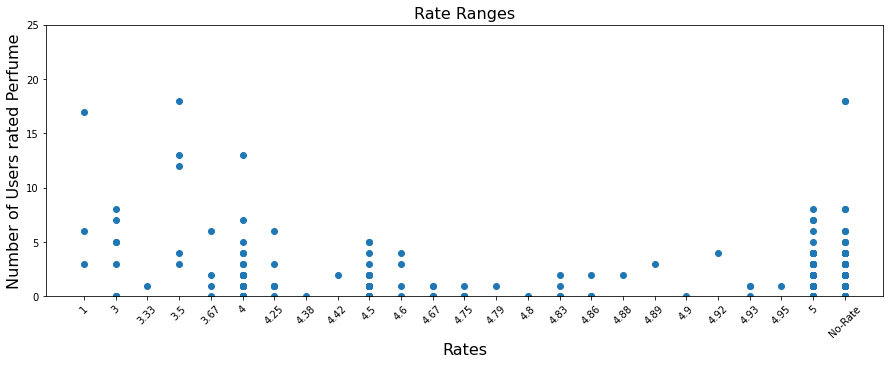

In [11]:
fig = plt.figure(figsize = (15, 5))
plt.scatter(df.Rate.sort_values(),df.Rating_count)
plt.title("Rate Ranges", fontsize=16)
plt.xlabel("Rates", fontsize=16)
plt.ylabel("Number of Users rated Perfume", fontsize=16)
plt.xticks(rotation=45)
plt.ylim(0, 25,auto=False)
plt.show()

### What makes a Perfume Luxurious?
- contains 3 notes(top,middle and base notes)
- It is a Eau de Parfum

In [12]:
df_perfumes=df.copy()
options = ['Perfume'] 
rslt_df1 = df_perfumes[df_perfumes['Product_Type'].isin(options)] 

rslt_df = rslt_df1[rslt_df1['Concentration'] == 'Eau de Parfum'] 

rslt_df = rslt_df1[rslt_df1['Price'] > '500'] 

In [13]:
df_perfumes = rslt_df[rslt_df["Top_note"].str.contains("NaN") == False]
df_perfumes = rslt_df[rslt_df["Middle_note"].str.contains("NaN") == False]
df_perfumes = rslt_df[rslt_df["Base_note"].str.contains("NaN") == False]
df_perfumes = rslt_df[rslt_df["Top_note"].str.contains("Unknown") == False]
df_perfumes = rslt_df[rslt_df["Middle_note"].str.contains("Unknown") == False]
df_perfumes = rslt_df[rslt_df["Base_note"].str.contains("Unknown") == False]

In [14]:
df_perfumes_Women = df_perfumes[(df_perfumes['Gender'] == 'Women') ]
df_perfumes_Men = df_perfumes[(df_perfumes['Gender'] == 'Men') ]
df_perfumes_Unisex = df_perfumes[(df_perfumes['Gender'] == 'Unisex') ]

**Women Luxury Brands**

In [15]:
stopwords_list = list(STOPWORDS)
list_words=['perfum','parfums','de','la','eau','perfume','parfumeur','oud','j','perfumes','di']
stopwords_list.extend(list_words)

In [16]:
from collections import Counter
 
def remov_duplicates(input):
 
    # split input string separated by space
    input = input.split(" ")
 
    # now create dictionary using counter method
    # which will have strings as key and their
    # frequencies as value
    UniqW = Counter(input)
 
    # joins two adjacent elements in iterable way
    s = " ".join(UniqW.keys())
    return ("\""+ s + "\"")

In [17]:
from wordcloud import WordCloud
def wordcloud_creation(df_data,stopwords_list):
    note_str = ','.join(str(v) for v in df_data)
    notesWordcloud = WordCloud(width=800, height=700, margin=0, background_color='white',
                     stopwords=stopwords_list , collocations=False).generate(remov_duplicates(note_str))
    plt.figure(figsize=(10,10))
    plt.imshow(notesWordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

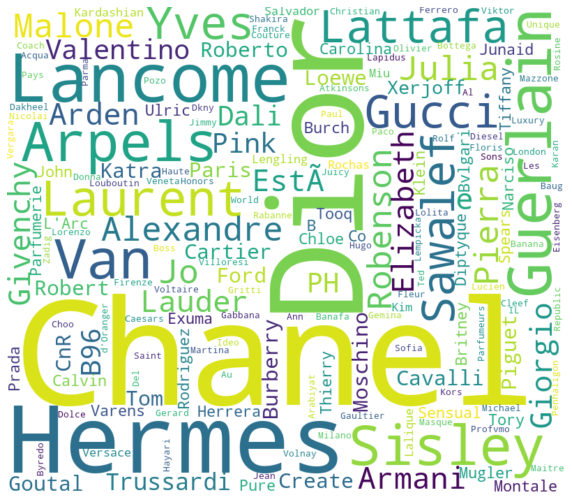

In [18]:
wordcloud_creation(df_perfumes_Women.Brand,stopwords_list)

From the wordcloud shown above:
- We can observe that Chanel,Dior,Lancome annd Guerlai are the most luxury brands for women

**Men Luxury Brand**

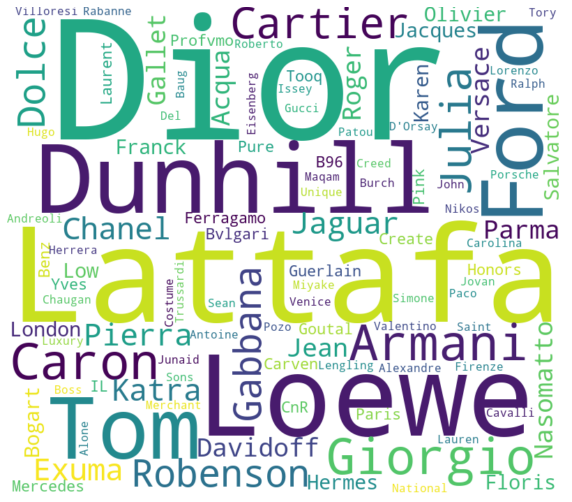

In [19]:
wordcloud_creation(df_perfumes_Men.Brand,stopwords_list)

From the wordcloud shown above:
- We can observe that Tom Ford, Lattafa ,Dior, Dunhill and Loewe are the most luxury brands for Men

**Unisex Luxury Brand**

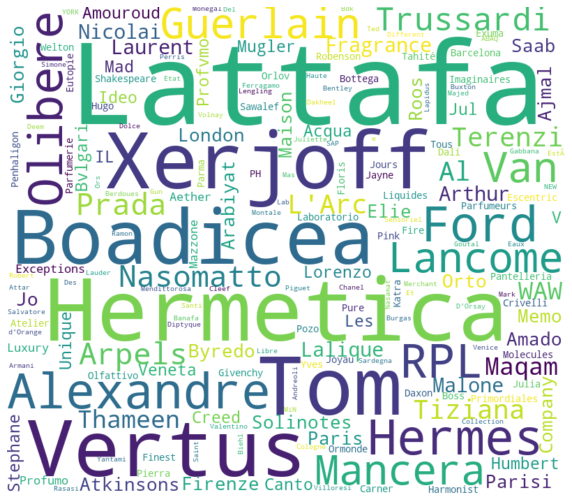

In [20]:
wordcloud_creation(df_perfumes_Unisex.Brand,stopwords_list)

From the wordcloud shown above:
- - We can observe that Lattafa, Hermetica,and Boadicea are the most luxury brands for both Men & Women

### What are the best fragrance note ideas and inspiration?
- From the luxury brand we can inspired fragrance with the most notes used 
- such as Base note (Musk,Amber, Vanilla, Patchouli and sandelwood)
- Middel note (rose, jasmine and lily) 
- and top note (Pergamont, mandareen and pink pepper)
- Base note according to luxury brand

**BASE NOTE**

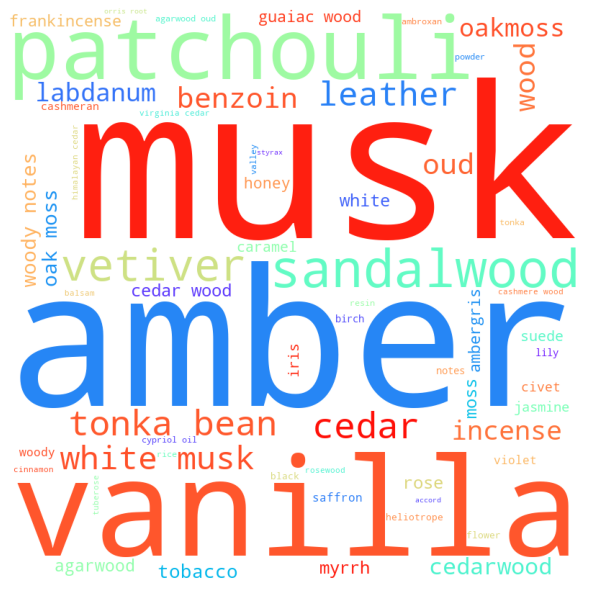

In [21]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_perfumes.Base_note:
 # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,colormap='rainbow',
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**MIDDLE NOTE**

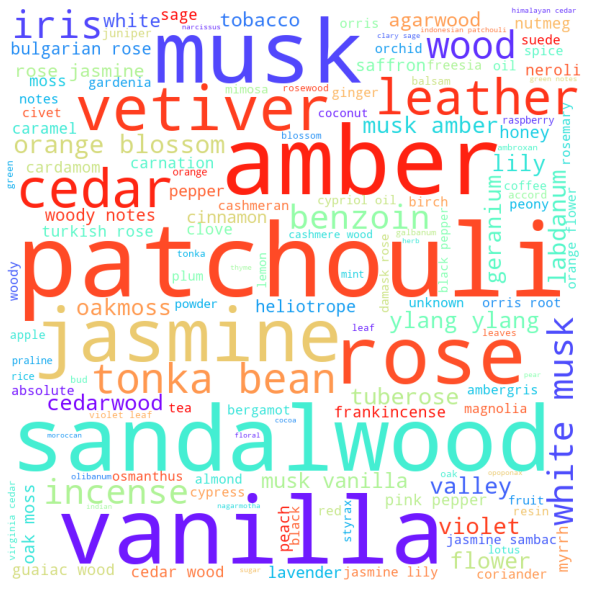

In [22]:
# iterate through the csv file
for val in df_perfumes.Middle_note:
 # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,colormap='rainbow',
                background_color ='white',
                stopwords = stopwords_list,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**TOP NOTE**

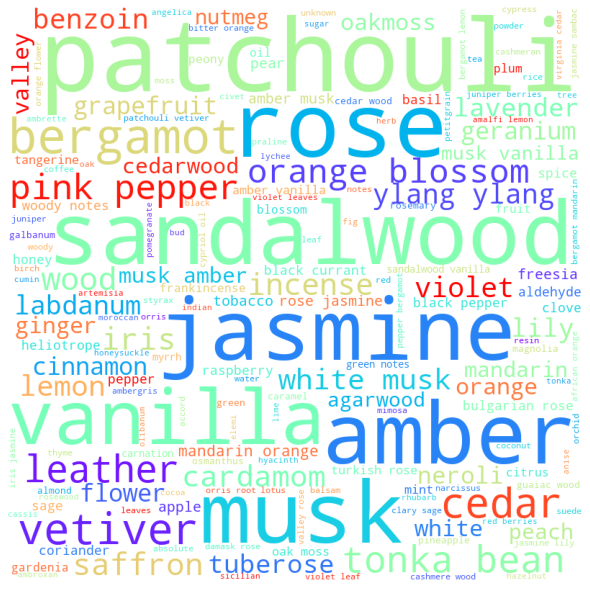

In [23]:
for val in df_perfumes.Top_note:
 # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,colormap='rainbow',
                background_color ='white',
                stopwords = stopwords_list,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### What are the most Used Base Notes for the Fragrances?

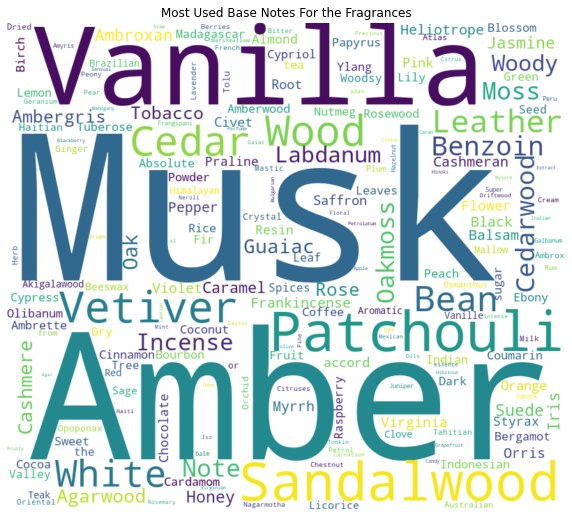

In [24]:
from wordcloud import WordCloud

note_str = ','.join(str(v) for v in df["Base_note"])

notesWordcloud = WordCloud(width=800, height=700, margin=0, background_color='white',
                     stopwords=["Unknown","nan","Tonka","and","Oud","of","Oil"], collocations=False).generate(note_str)

plt.figure(figsize=(10,10))
plt.title('Most Used Base Notes For the Fragrances')
plt.imshow(notesWordcloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Analysis:

- The above wordcloud is a visual representation of words in a text where the size of the word corresponds to its overall frequency.
- Accordingly, the words (Amber,Patchouli,Musk,and Vanilla) appear bigger which means  that they tend to exist more frequently withib the fragrances that are allotted within the dataset.

### What are the Best Rated Fragrance Families According to Women?

Text(0.5, 1.0, ' Best Rated Fragrance Families According to Women')

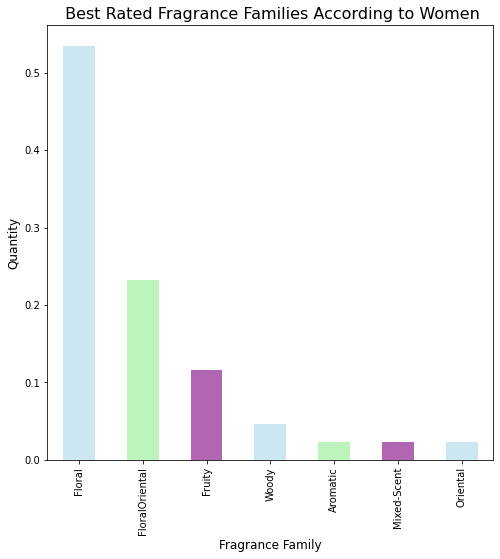

In [25]:
Women_Top=df[(df.Gender == 'Women') & (df.Rate >= '4.5') & (df.Rating_count >= 3)]
#Women_Top['Brand'].value_counts().plot(kind = 'barh', figsize = (5,5), title = 'best liked by Women');

Women_Top['Fragrance_Family'].value_counts(normalize=True).plot(kind = 'bar', subplots = False, figsize = (8,8),color=['lightblue','lightgreen','purple'], alpha = .6)

plt.xlabel('Fragrance Family',fontsize=12)
plt.ylabel('Quantity',fontsize=12)
plt.title(' Best Rated Fragrance Families According to Women',fontsize=16)

### Analysis:

- The best rated Fragrance family according to women are the floral and floral_oriental scents

### What are the Best Rated Fragrance Families According to Men?

Text(0.5, 1.0, ' Best Rated Fragrance Families According to Men')

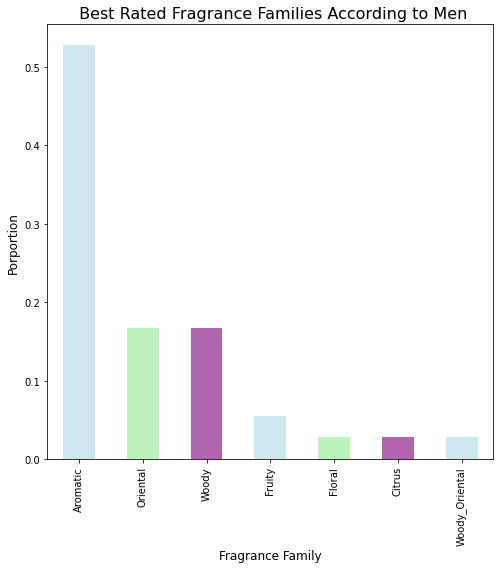

In [26]:
Women_Top=df[(df.Gender == 'Men') & (df.Rate >= '4.5') & (df.Rating_count >= 3)]
#Women_Top['Brand'].value_counts().plot(kind = 'barh', figsize = (5,5), title = 'best liked by Women');

Women_Top['Fragrance_Family'].value_counts(normalize =True).plot(kind = 'bar', subplots = False, figsize = (8,8),color=['lightblue','lightgreen','purple'], alpha = .6)

plt.xlabel('Fragrance Family',fontsize=12)
plt.ylabel('Porportion',fontsize=12)
plt.title(' Best Rated Fragrance Families According to Men',fontsize=16)

### Analysis:

- The best rated Fragrance family according to men are the aromatic,oriental and woody scents

### What is the Average Price of the Fragrance Families? 

In [27]:
df_copy=df.copy()
df_copy =df_copy[df_copy['Rate'] !='No-Rate']
df_copy['Rate']=df_copy['Rate'].astype(float)

In [28]:
df_copy.groupby(['Brand']).mean()['Rate'].sort_values(ascending = False).to_frame(name = 'Average Ratings').tail(10)


,Average Ratings
Brand,
Nikos,4.500000
Davidoff,4.450000
Mont Blanc,4.341818
Chloe,4.250000
Dunhill,4.093750
Fan di Fendi,4.000000
Jovan,4.000000
Jimmy Choo,3.000000
Abercrombie & Fitch,3.000000


In [29]:
df_copy.groupby(['Fragrance_Family','Gender']).mean()['Rate'].sort_values(ascending = False).to_frame(name = 'Average Ratings')

Average Ratings
Fragrance_Family Gender                 
Leather          Men            5.000000
Citrus           Unisex         5.000000
Aquatic          Unisex         5.000000
Oud              Men            5.000000
FloralFruity     Women          5.000000
Soft_Oriental    Unisex         5.000000
                 Women          5.000000
Citrus           Women          5.000000
Leather          Women          5.000000
Citrus           Men            5.000000
Chypre           Unisex         5.000000
Aromatic         Unisex         5.000000
Woody_Oriental   Unisex         5.000000
Mixed-Scent      Unisex         4.991111
FloralOriental   Unisex         4.960526
Oriental         Unisex         4.953214
Woody            Women          4.941538
Mixed-Scent      Women          4.937500
Fruity           Men            4.928571
Woody_Oriental   Men            4.892857
Aromatic         Women          4.888889
Woody            Unisex         4.863636
Fruity           Women          4.860000
Woody_Oriental   Women          4.857143
Floral           Unisex         4.834737
Soft_Floral      Women          4.833333
                 Unisex         4.830000
FloralOriental   Women          4.805405
Floral           Women          4.783095
Aromatic         Men            4.764250
Floral           Men            4.750000
Leather          Unisex         4.728750
Soft_Oriental    Men            4.666667
Woody            Men            4.649565
Oriental         Women          4.500000
                 Men            4.463611
Aquatic          Men            4.333333
Chypre           Women          4.000000
Aquatic          Women          4.000000
FloralOriental   Men            3.670000

In [30]:
df_price =df[df['Price'] !='none']
df_price.Price=df_price.Price.astype(int)

/usr/local/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0.5, 1.0, 'Average Price Based on the Fragrance Family')

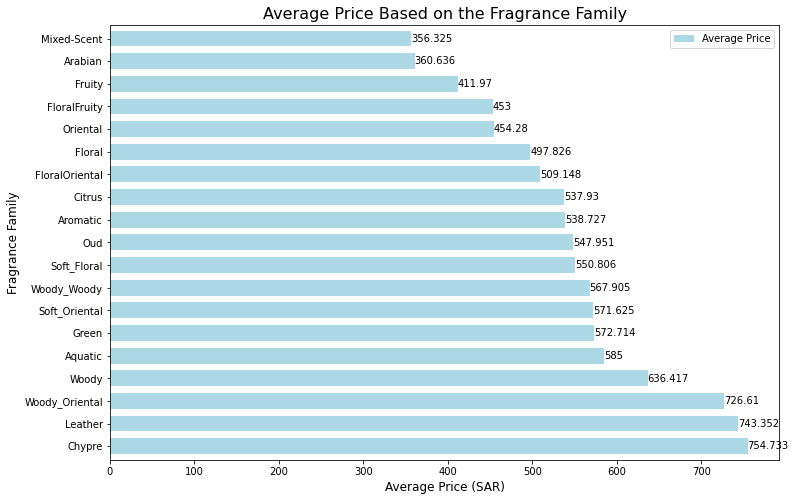

In [31]:
df_price =df_price[df_price.Product_Type == 'Perfume']
ax=df_price.groupby(['Fragrance_Family']).mean()['Price'].sort_values(ascending = False).to_frame(name = 'Average Price').plot.barh(figsize=(12,8), rot=0, width=0.7,color= ['lightblue','lightgreen','pink','blue'])
ax.bar_label(ax.containers[0])
plt.xlabel('Average Price (SAR)',fontsize=12)
plt.ylabel('Fragrance Family',fontsize=12)
plt.title('Average Price Based on the Fragrance Family',fontsize=16)

From the bar plot that is shown above:
- The chypre,leather and woody oriental fragrances tend to me on average the most expensive in comparison to floral,fruity and oriental scents.

### Timeline of the Fragrances that have been Introduced Over the Years

In [32]:
df_year = df.loc[df["Year"].between("1900", "2022")]
df_year.shape

(3701, 17)

Text(0.5, 1.0, 'Timeline of the Fragrances that have been Introduced Over the Years')

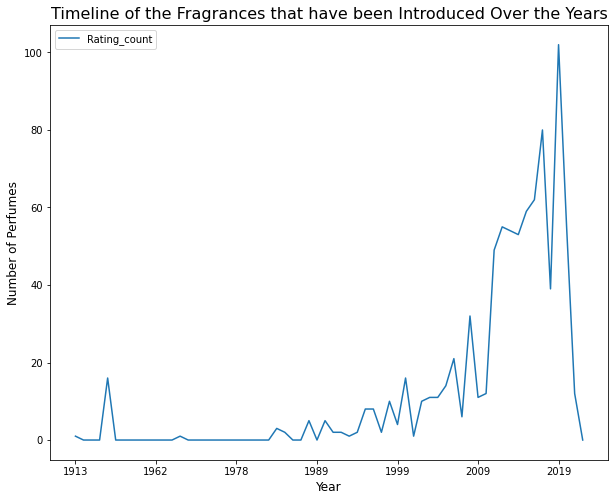

In [69]:
year_plot=df_year.groupby(['Year']).sum().plot.line(figsize=(10,8))
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of Perfumes',fontsize=12)
plt.title('Timeline of the Fragrances that have been Introduced Over the Years',fontsize=16)
#plt.legend('year')

### What are the most popular words for the Top Perfumes ?

In [59]:
df_high=df[(df.Rate >= '4.5') & (df.Rating_count >= 3) & (df.Product_Type =='Perfume')]
brands_list= df_high['Brand'].unique().tolist()
stopword_list= ['Le','Creed','Chanel','Armani','Giorgio','The','Perfumes','Elie','Saab','EDC','Majed','Jo','Malone','Collection','Oil','Musk','Victoria','Secret','Van','Cleef',
'Tom','Ford','Dolce','Jimmy','Choo','Gabbana','Hugo','Boss','Calvin','Klein','Jo Malone',
'Men','Women','For','Pour Femme''Gift Set','Yves','Saint','Hair','Mist','Al','Dakheel','EDP','EDT',
'Oud','Perfume','Pour','Femme','Parfum','Toilette','Eau','De','Eau De Perum','Les','ml',"Eau", "Parfum","Toilette", "de", "set", "Travel", "Mini", "Perfume", 
"Spray", "Cologne", "For", "Rollerball", "Oil", "Gift", "Fragrance", "Body"]

In [60]:
stopword_list.extend(brands_list)

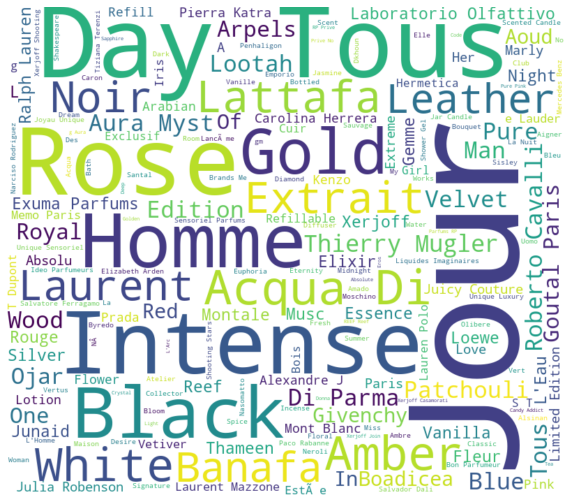

In [61]:
df_word=df[df.Product_Type == 'Perfume']
fragrance_words= df_word['Name'].str.cat(sep="\n")
name_wordcloud= WordCloud(width=800, height=700, background_color="white",stopwords = stopword_list).generate(fragrance_words)
plt.figure(figsize=(10,10))
plt.imshow(name_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Analysis:

- The above wordcloud simply portrays the words that appear more frequently in perfumes .Some of these words include intense,rose,gold,Jour,Tous,Amber,etc ...

In [71]:
top_words=list(name_wordcloud.words_.keys())
top_words=top_words[:15]
top_words

['Jour',
 'Day Tous',
 'Rose',
 'Intense',
 'Homme',
 'Black',
 'Gold',
 'Acqua Di',
 'Amber',
 'White',
 'Lattafa',
 'Extrait',
 'Noir',
 'Laurent',
 'Banafa']

In [72]:
df_top_name=df[df.Name.str.contains('|'.join(top_words))]

Text(0.5, 1.0, 'Average Rate on the brand Based on Word used in the Perfume')

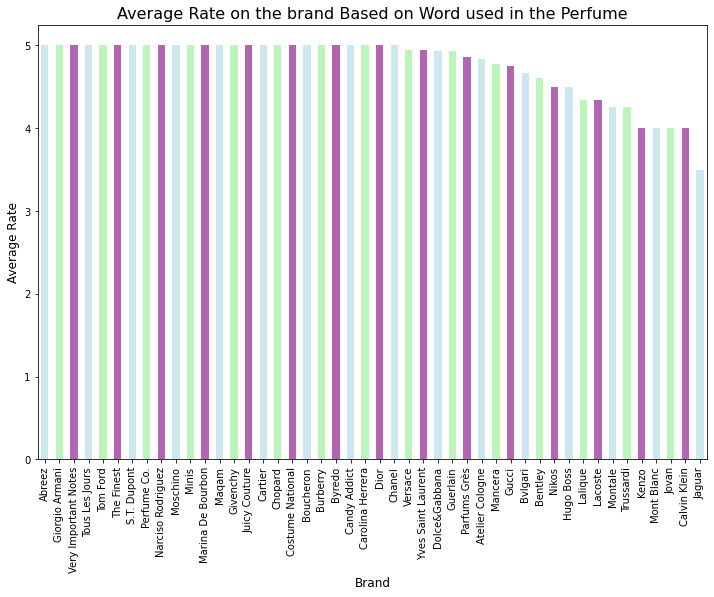

In [76]:
df_top_name=df_top_name[df_top_name.Rate != 'No-Rate']
df_top_name.Rate=df_top_name.Rate.astype('float')
df_top_name.groupby(['Brand'])['Rate'].mean().sort_values(ascending = False).plot(kind = 'bar', subplots = False, figsize = (12,8),color=['lightblue','lightgreen','purple'], alpha = .6)
plt.xlabel('Brand',fontsize=12)
plt.ylabel('Average Rate',fontsize=12)
plt.title('Average Rate on the brand Based on Word used in the Perfume',fontsize=16)

### Analysis:

The bar chart above shows that the majority of the brands that attain perfumes including the top words attained a high rating.

### Display a Timeline of the average price of the Fragrances Over Time

Text(0.5, 1.0, 'Timeline of the average price of the Fragrances')

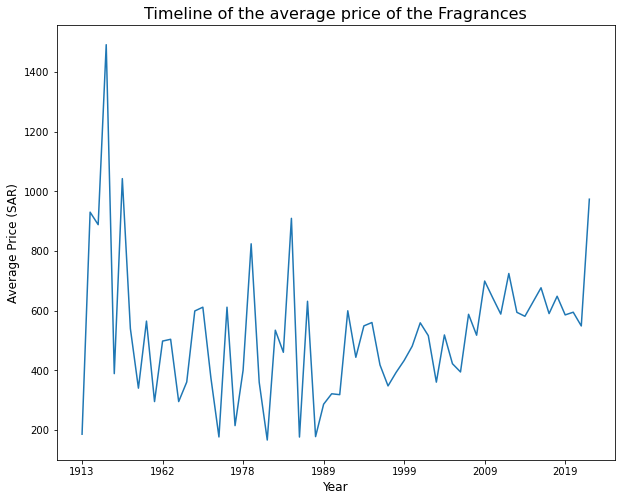

In [82]:
df_price_year=df_price.loc[df_price["Year"].between("1900", "2022")]
df_price_year.groupby(['Year'])['Price'].mean().plot.line(figsize=(10,8))
plt.xlabel('Year',fontsize=12)
plt.ylabel('Average Price (SAR)',fontsize=12)
plt.title('Timeline of the average price of the Fragrances',fontsize=16)

### What is the Average Price of Perfumes with Star Ingredients?

In [87]:
lists = [notes.split(', ') for notes in df_price.Ingredients if type(notes) != float]
notes_list = [item for sublist in lists for item in sublist]
notes_list = [string.strip() for string in notes_list]
tt = pd.Series(notes_list).value_counts().nlargest(15)
df_price=df_price[(df_price.Rate >= '4.5') & (df_price.Rating_count >= 3)]

Text(0.5, 0, 'Average Price (SAR)')

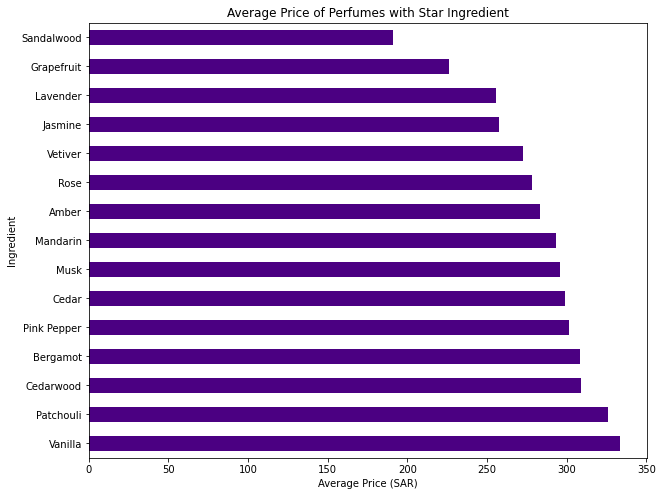

In [90]:
df_price['Ingredients'] = df_price['Ingredients'].fillna('')
avgPrice = [df_price[df_price.Ingredients.str.contains('.*'+ing+'.*', regex=True)]['Price'].mean() for ing in tt.keys()]
df_ingredient = pd.DataFrame(zip(tt.keys(), avgPrice))
df_ingredient.columns = ['Perfume_Ingredient', 'Price']
df_ingredient=df_ingredient.sort_values(ascending=False,by='Price')
df_ingredient.plot.barh(x = 'Perfume_Ingredient', color = 'indigo', legend= None)
plt.rcParams["figure.figsize"] = (10,8)
plt.title('Average Price of Perfumes with Star Ingredient')
plt.ylabel('Ingredient')
plt.xlabel('Average Price (SAR)')


### What is the Average Perfume Bottle Size based on the Concentration of the Perfume?

In [106]:
df_con=df.copy()
df_con['Size'] = df_con['Size'].str.replace("ml_","")

In [107]:
df_con['Size'] = df_con['Size'].str.replace("_"," ")

In [108]:
df_con['Size'] = df_con['Size'].str.replace("ml","")

In [109]:
df_con['Size']= df_con['Size'].astype(int)

In [114]:
df_con.Concentration=df_con.Concentration.str.lstrip()
df_con.Concentration=df_con.Concentration.str.rstrip()

In [124]:
#df_con.Concentration.value_counts()

In [118]:
concentration_list=['Parfum','Eau de Parfum',                
'Eau de Toilette' ,                                 
'Eau de Cologne'   , 
'Extrait de Parfum',
'Eau de Parfum Intense',
'Eau Fraiche',
'Eau de Soin']

In [121]:
df_con=df_con.loc[df_con.Concentration.isin(concentration_list)]
df_con.groupby(df_con.Concentration)['Size'].mean()


Concentration
Eau Fraiche               86.666667
Eau de Cologne           106.428571
Eau de Parfum             85.421578
Eau de Parfum Intense     91.666667
Eau de Soin               50.000000
Eau de Toilette           92.462838
Extrait de Parfum         67.256410
Parfum                   107.235294
Name: Size, dtype: float64

Text(0.5, 1.0, 'Average Perfume Bottle Size based on the Concentration')

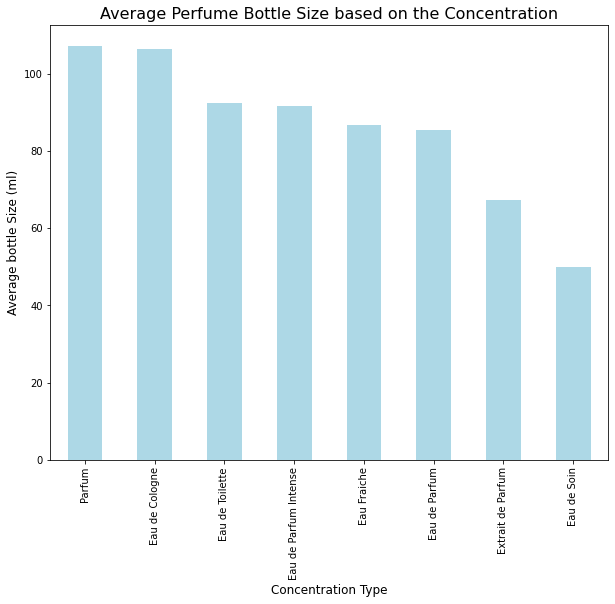

In [125]:
df_con.groupby(df_con.Concentration)['Size'].mean().sort_values(ascending=False).plot.bar(x = 'Concentration', color = 'lightblue', legend= None)

plt.xlabel('Concentration Type',fontsize=12)
plt.ylabel('Average bottle Size (ml)',fontsize=12)
plt.title('Average Perfume Bottle Size based on the Concentration',fontsize=16)

In [220]:
df_new=pd.read_csv('/Users/roze/Documents/Misk-Skills/dsi_2022-02/group_assignment2/Cleaned_Golden_Scent_df.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4669 entries, 0 to 4668
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              4669 non-null   object
 1   Price             4669 non-null   object
 2   Rate              4669 non-null   object
 3   Rating_count      4669 non-null   int64 
 4   Details           4669 non-null   object
 5   Brand             4669 non-null   object
 6   Gender            4669 non-null   object
 7   Product_Type      4669 non-null   object
 8   Character         4669 non-null   object
 9   Fragrance_Family  4669 non-null   object
 10  Size              4669 non-null   object
 11  Year              3801 non-null   object
 12  Ingredients       4553 non-null   object
 13  Concentration     4470 non-null   object
 14  Top_note          4518 non-null   object
 15  Middle_note       4352 non-null   object
 16  Base_note         4252 non-null   object
dtypes: int64(1), o

In [85]:
df_new = df.copy()

In [86]:
df_new.Price = df_new.Price.replace('none', np.nan)

In [87]:
df_new.Price = df_new.Price.astype('Int32')

In [88]:
df_new.Year = df_new['Year'].str.extract(r'^(\d{4})', expand=False)


In [94]:
df_new.Year = df_new.Year.astype('Int32')

In [95]:
df_new['Fragrance_Family'] = df_new['Fragrance_Family'].str.replace('Woody_Woody','Woody')

In [89]:
def spl(a):
    return a.split('_')[0]

In [90]:
df_new["Size"] = df_new.Size.map(spl)

### What are the top 10 Most Expensive brand on Average?

Text(0.5, 1.0, 'Price in (SAR) vs. Brands')

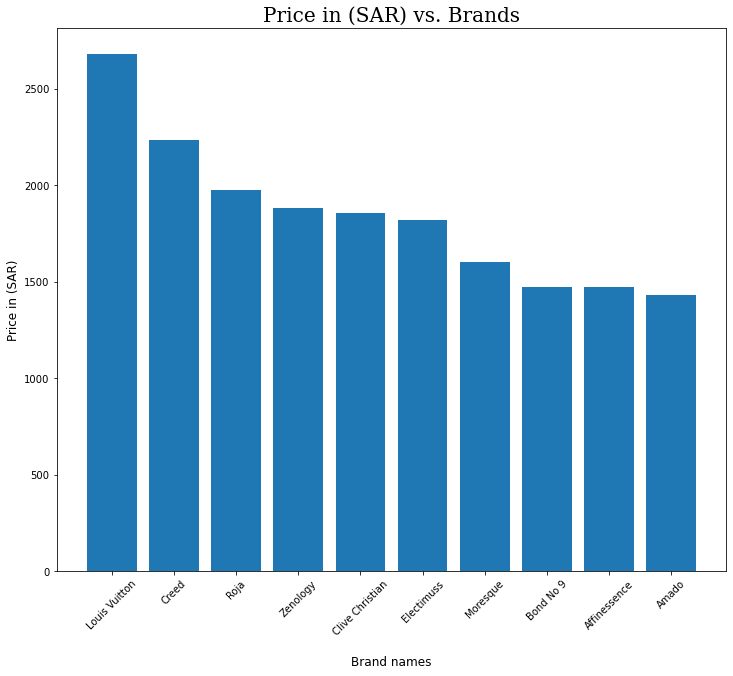

In [96]:
brand_avg = df_new.groupby(["Brand",'Rate','Size','Product_Type'])[['Price']].mean().reset_index()


top_brands = brand_avg.groupby("Brand").mean()\
    .sort_values('Price', ascending=False).reset_index().head(10)


plt.figure(figsize=(12,10))
plt.bar(top_brands['Brand'], top_brands['Price'])
plt.ylabel('Price in (SAR)', fontsize = 12)
plt.xlabel('\nBrand names', fontsize = 12)
plt.xticks(rotation=45)
plt.title('Price in (SAR) vs. Brands', fontsize = 20,family = 'serif')

**Analysis**
- The above plot portrays the top brands based on average price , rating , Size and Product Type.
- Louis vuitton is the top one with 2680,the three in the middle are in range(1820 to 1882) , Bond No 9 and Affinessence with the same avg price 1472


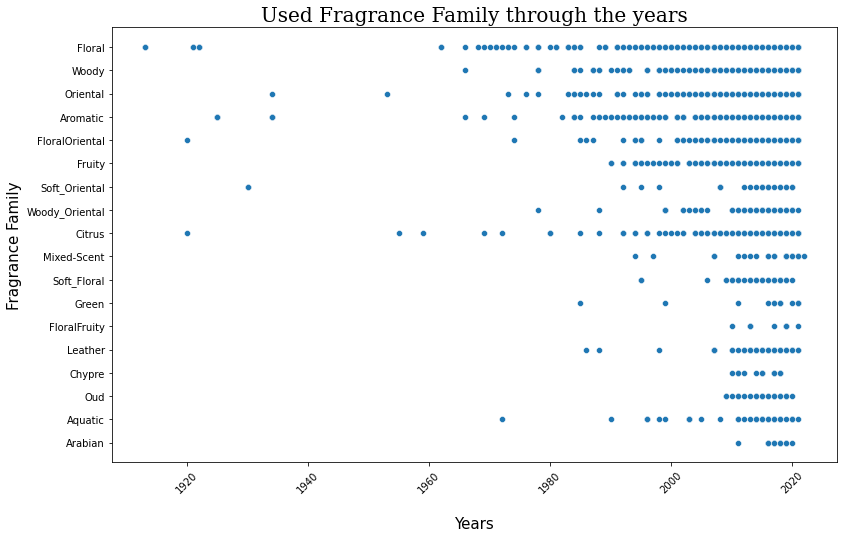

In [99]:
year_ = df_new[df_new.Year >= 1900]


plt.figure(figsize=(13,8))
sns.scatterplot(data=year_, x='Year', y='Fragrance_Family')
plt.ylabel('Fragrance Family', fontsize = 15)
plt.xlabel('\nYears', fontsize = 15)
plt.xticks(rotation=45)
plt.title('Used Fragrance Family through the years', fontsize = 20,family = 'serif');

### Timeline the fragrance family through years?

**Analysis**
- floral, oriental, aromtic, floral oriental and citrus used before 1940
- fruity types and woody types used after 1980

### What are the Total Number of Perfumes in each Fragrance Family Category?

Text(0.5, 1.0, 'Number of Perfumes In Each Fragrance Family')

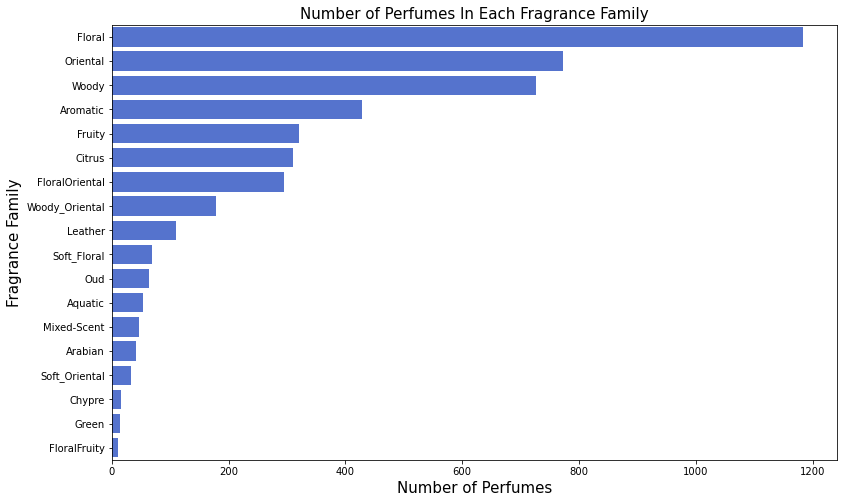

In [100]:
fml = df_new['Fragrance_Family'].value_counts()

index = fml.nlargest(20).index
value = fml.nlargest(20).values

plt.figure(figsize=(13,8))
sns.barplot(x = value, y = index,color='royalblue', data=df_new)
plt.xlabel('Number of Perfumes', fontsize = 15)
plt.ylabel('Fragrance Family', fontsize = 15)
plt.title('Number of Perfumes In Each Fragrance Family', fontsize = 15)

**Analysis**
- We can see here that the dominating Fragrance families are the floral, oriental and woody scents.

### Gender Preferences Based on the the Fragrance Family

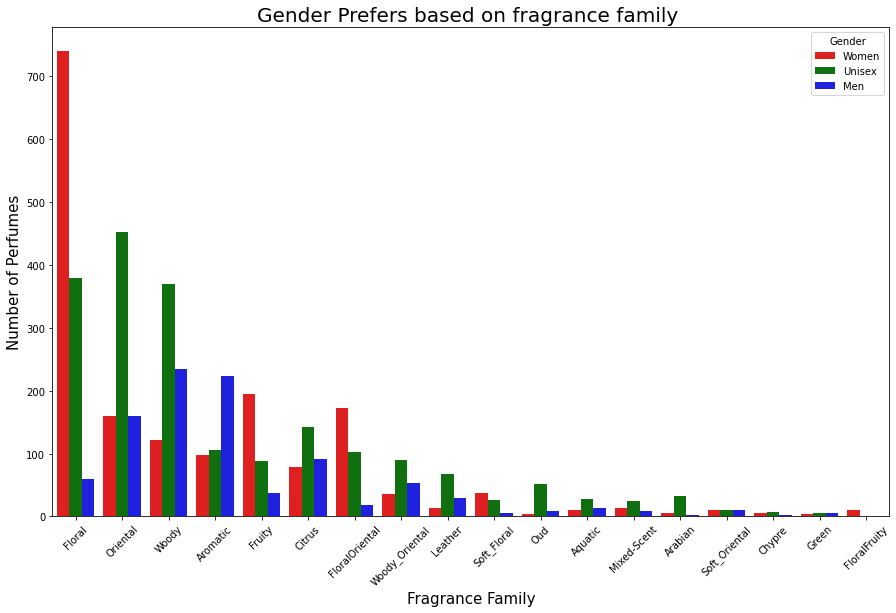

In [101]:
df__ = df_new[df_new.Gender != 'Kids']
color = ['red','green','blue']

plt.figure(figsize=(15,9))
sns.countplot(x='Fragrance_Family' , data=df__ ,order = df__['Fragrance_Family'].value_counts().index, hue='Gender', palette = color)
plt.xticks(rotation=45)
plt.ylabel('Number of Perfumes', fontsize = 15)
plt.xlabel('Fragrance Family', fontsize = 15)
plt.title('Gender Prefers based on fragrance family ' , fontdict={'fontsize':20})
plt.legend(title="Gender", loc="upper right", labels=["Women",'Unisex', "Men"]);

**Analysis**
- women prefers floral types and fruity
- men prefers woody and aromatic  

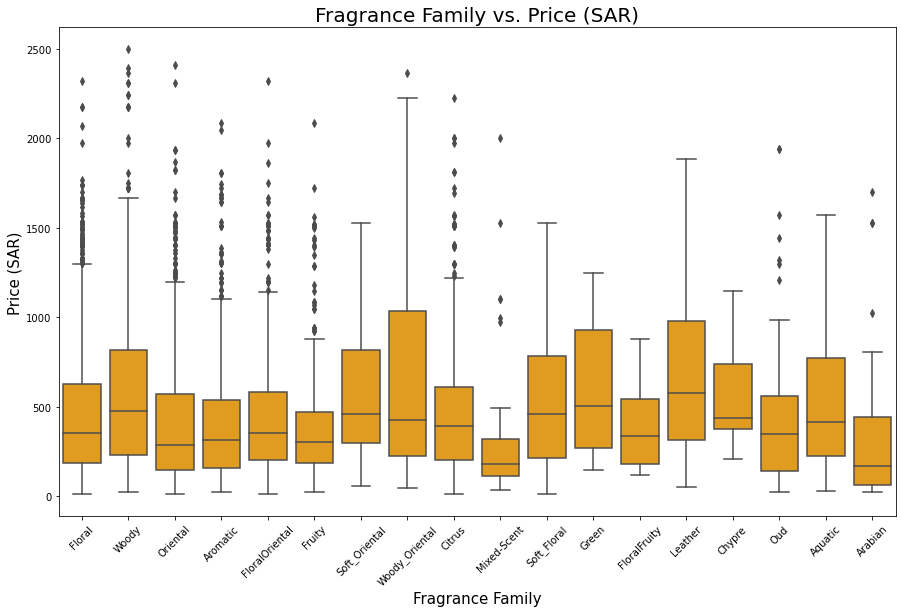

In [102]:
df2 = df_new[df_new.Price < 2500]

plt.figure(figsize=(15,9))
sns.boxplot(x='Fragrance_Family',y='Price',data=df2, color = 'orange')
plt.xticks(rotation=45)
plt.ylabel('Price (SAR)', fontsize = 15)
plt.xlabel('Fragrance Family', fontsize = 15)
plt.title('Fragrance Family vs. Price (SAR)' , fontdict={'fontsize':20});